In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,MANAGER,PRACTITIONER,MONTH,AMOUNT,LOB
0,0,0,11,29.0,MARKETING
1,0,0,10,29.0,MARKETING
2,0,0,12,28.0,MARKETING
3,0,1,1,19.0,PFS
4,0,1,2,19.0,PFS


In [49]:
df.shape

(591, 5)

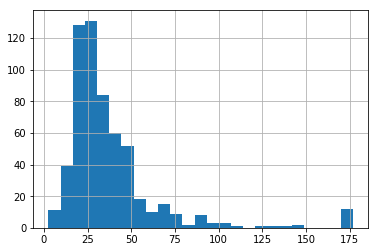

In [50]:
hist = df['AMOUNT'].hist(bins=25)

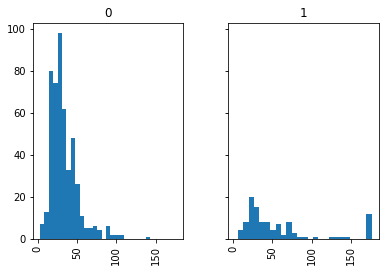

In [51]:
hist = df.hist(by='MANAGER', column='AMOUNT', bins=25, sharey=True, sharex=True)

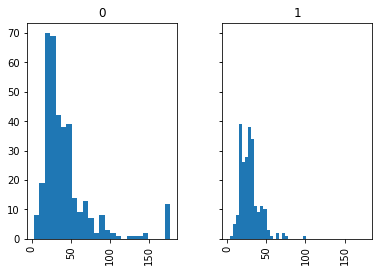

In [53]:
hist = df.hist(by='PRACTITIONER', column='AMOUNT', bins=25, sharey=True, sharex=True)

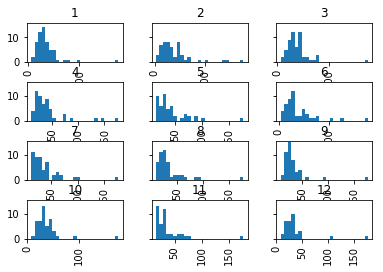

In [54]:
hist = df.hist(by='MONTH', column='AMOUNT', bins=25, sharey=True)

In [22]:
Feature = df
Feature = pd.concat([Feature,pd.get_dummies(df['LOB'])], axis=1)
del Feature['LOB']
Feature.head()

,MANAGER,PRACTITIONER,MONTH,AMOUNT,ADMIN & GENERAL,INS,MARKETING,PFS,PMO,SECURITY SOLUTIONS,SWS,TSS
0,0,0,11,29.0,0,0,1,0,0,0,0,0
1,0,0,10,29.0,0,0,1,0,0,0,0,0
2,0,0,12,28.0,0,0,1,0,0,0,0,0
3,0,1,1,19.0,0,0,0,1,0,0,0,0
4,0,1,2,19.0,0,0,0,1,0,0,0,0


In [29]:
msk = np.random.rand(len(df)) < 0.8
train = Feature[msk]
test = Feature[~msk]
# predictors = ['MANAGER', 'PRACTITIONER', 'MONTH', 'ADMIN & GENERAL', 'INS', 'MARKETING', 'PFS', 'PMO', 'SECURITY SOLUTIONS', 'SWS', 'TSS']
predictors = ['PRACTITIONER']
target = ['AMOUNT']

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[predictors])
y = np.asanyarray(train[target])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-12.53134744]]


In [ ]:
y_hat= regr.predict(test[predictors])
x = np.asanyarray(test[predictors])
y = np.asanyarray(test[target])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))